In [ ]:
# Step 1: Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
# Step 3: Load the Dataset into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/data_ndv/netflix_titles.csv")
print("\nFirst 5 records:")
print(df.head())
print("\nLast 5 records: ")
print(df.tail())


First 5 records:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septembe

In [5]:
# Step 4: Inspect the Dataset
print("\nDataset shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Records:", df.duplicated().sum())


Dataset shape: (8807, 12)

Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Duplicate Records: 0


In [6]:
# Step 5: Drop Duplicate Records
df.drop_duplicates(inplace=True)
print("\nShape after removing duplicates:", df.shape)


Shape after removing duplicates: (8807, 12)


In [7]:
# Step 6: Handle Missing Values
# Fill 'rating' with mode
rating_mode = df['rating'].mode()[0]
df['rating'].fillna(rating_mode, inplace=True)

<ipython-input-7-da9e9d9f84db>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(rating_mode, inplace=True)


In [8]:
# Fill 'country' and 'director' with 'Unknown'
df['country'].fillna("Unknown", inplace=True)
df['director'].fillna("Unknown", inplace=True)

<ipython-input-8-98baf658a264>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("Unknown", inplace=True)
<ipython-input-8-98baf658a264>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [9]:
# Drop rows where 'cast' is missing
df.dropna(subset=['cast'], inplace=True)

In [10]:
# Step 6.1: Clean and Convert 'date_added'
# Strip spaces and convert to datetime, coercing errors to NaT
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [11]:
# Check and drop rows with invalid or missing 'date_added'
print("\nMissing or invalid 'date_added' entries:", df['date_added'].isnull().sum())
df = df.dropna(subset=['date_added'])


Missing or invalid 'date_added' entries: 10


In [12]:
# Step 6.2: Fill missing 'duration' with mode per 'type'
for content_type in df['type'].unique():
    mode_val = df[df['type'] == content_type]['duration'].mode()[0]
    df.loc[(df['type'] == content_type) & (df['duration'].isnull()), 'duration'] = mode_val

In [13]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [14]:
# Step 7: Convert Data Types
# 'date_added' is already datetime
# Create new columns for year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [15]:
# Step 8: NumPy Transformations
# Calculate title length using NumPy
df['title_length'] = df['title'].apply(lambda x: np.char.str_len(x))

In [16]:
# Step 9: Filtering, Sorting, Grouping
# Filter only Movies
movies_df = df[df['type'] == 'Movie']

In [17]:
# Sort dataset by year_added descending
df_sorted = df.sort_values(by='year_added', ascending=False)

In [18]:
# Group by content type
type_counts = df['type'].value_counts()
print("\nContent Type Counts:")
print(type_counts)


Content Type Counts:
type
Movie      5656
TV Show    2316
Name: count, dtype: int64


In [19]:
# Step 10: Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       show_id   type   title director                cast        country  \
count     7972   7972    7972     7972                7972           7972   
unique    7972      2    7972     4153                7682            690   
top      s8807  Movie  Zubaan  Unknown  David Attenborough  United States   
freq         1   5656       1     2272                  19           2482   
mean       NaN    NaN     NaN      NaN                 NaN            NaN   
min        NaN    NaN     NaN      NaN                 NaN            NaN   
25%        NaN    NaN     NaN      NaN                 NaN            NaN   
50%        NaN    NaN     NaN      NaN                 NaN            NaN   
75%        NaN    NaN     NaN      NaN                 NaN            NaN   
max        NaN    NaN     NaN      NaN                 NaN            NaN   
std        NaN    NaN     NaN      NaN                 NaN            NaN   

                           date_added  release_year ra

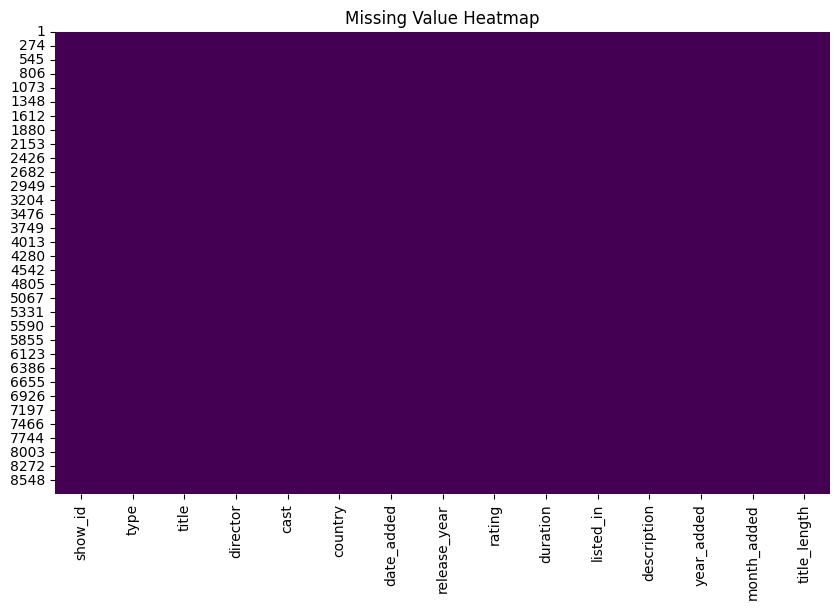

In [20]:
# Step 11: Visualizations
# Visualize missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

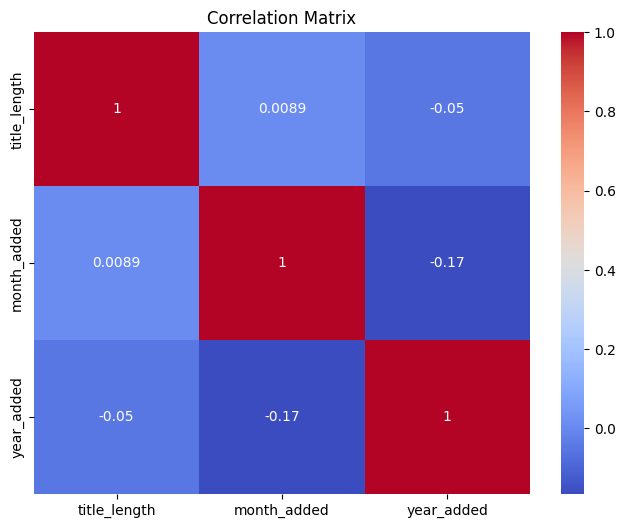

In [21]:
# Correlation matrix for numerical fields
plt.figure(figsize=(8, 6))
sns.heatmap(df[['title_length', 'month_added', 'year_added']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-22-96765a2f3f9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


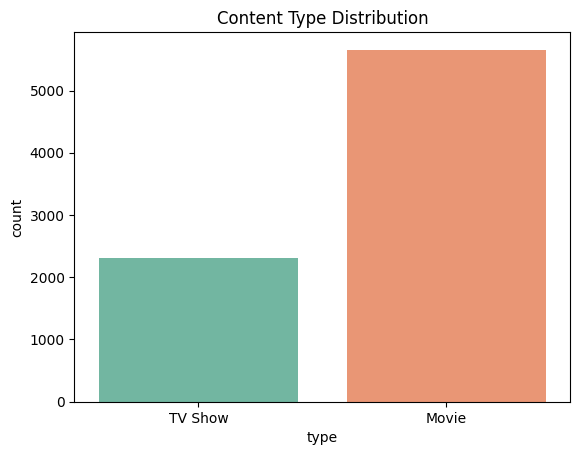

In [22]:
# Bar chart of content type distribution
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Content Type Distribution")
plt.show()

In [23]:
# Step 12: Label Encoding for ML-readiness
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
df['rating_encoded'] = le.fit_transform(df['rating'])

In [24]:
# Step 13: Save Cleaned Dataset
df.to_csv("clean_netflix_titles.csv", index=False)
print("\nCleaned dataset saved as 'clean_netflix_titles.csv'")


Cleaned dataset saved as 'clean_netflix_titles.csv'
